In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import itertools

In [2]:
from NN.Activations import Relu, Sigmoid
from NN.Layers import InputLayer, DenseLayer
from NN.Losses import MSE
from NN.NeuralNetwork import SequentialNeuralNet
from NN.utils import label_to_classes

In [3]:
iris = datasets.load_iris()
X = iris['data'] / np.max(iris['data'])
Y = iris['target']
Y = label_to_classes(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y)


Epoch 9999/10000 - loss: 6.8655e-04 Accuracy: 95.54

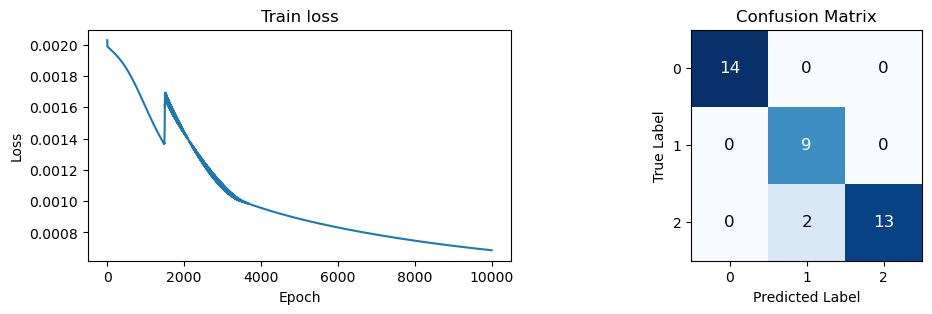

In [37]:
model = SequentialNeuralNet([
    InputLayer(X.shape[1]),
    DenseLayer(64, Sigmoid()),
    DenseLayer(Y.shape[1], Sigmoid())
])

loss = MSE()
model.build(loss)

model.fit(x_train, y_train, epochs=10000, lr=0.1, showAccuracy=True)
pred = model.predict(x_test)

true_labels, pred_labels = np.argmax(y_test, axis=1), np.argmax(pred, axis=1)
cm = np.zeros((Y.shape[1], Y.shape[1]))
for i in range(len(y_test)):
    cm[pred_labels[i] ,true_labels[i]] += 1

plt.figure(figsize=(12, 3))

ax = plt.subplot(1, 2, 1)
plt.plot(model.loss)
ax.set(
    title ='Train loss' ,
    xlabel = 'Epoch' ,
    ylabel = 'Loss' ,
)


ax = plt.subplot(1, 2, 2)
plt.imshow(cm, cmap = plt.cm.Blues)
ax.set(title ='Confusion Matrix' ,
       xlabel = 'Predicted Label' ,
       ylabel = 'True Label' ,
       xticks = range(Y.shape[1]) ,
       yticks = range(Y.shape[1]) ,)

color_thresh = (np.max(cm) - np.min(cm))/2

for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j , i , f'{cm[i , j]:.0f}' ,
             horizontalalignment = 'center' ,
             verticalalignment = 'center' ,
             color = 'white' if cm[i , j] > color_thresh  else 'black' ,
             size = 12)

plt.show()